In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [9]:
import os
import tensorflow as tf
import keras
import cv2

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2


In [11]:
import zipfile
import os

# Define the path to your zip file and the directory to extract it to
zip_file_path = 'C:\\Users\\Lenovo\\OneDrive\\Documents\\archive.zip'
extraction_path = 'C:\\Users\\Lenovo\\Documents\\Extracted_Data'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Now, update your directory paths to point to the extracted data
train_dir = os.path.join(extraction_path, 'train')
test_dir = os.path.join(extraction_path, 'test')

# Your original code can now run without the FileNotFoundError
#Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
#Test_Count  = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)
#train_dir = 
#test_dir = 
def Classes_Count(path, name):
    Classes_Dict = {}
    for cls in os.listdir(path):
        Classes_Dict[cls] = len(os.listdir(os.path.join(path, cls)))
    df = pd.DataFrame(Classes_Dict, index=[name])
    return df

Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count  = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)

In [12]:
pd.concat([Train_Count,Test_Count],axis=1)

,Train,Test
happy,7215,1774
neutral,4965,1233
sad,4830,1247
fear,4097,1024
angry,3995,958
surprise,3171,831
disgust,436,111


<Axes: >

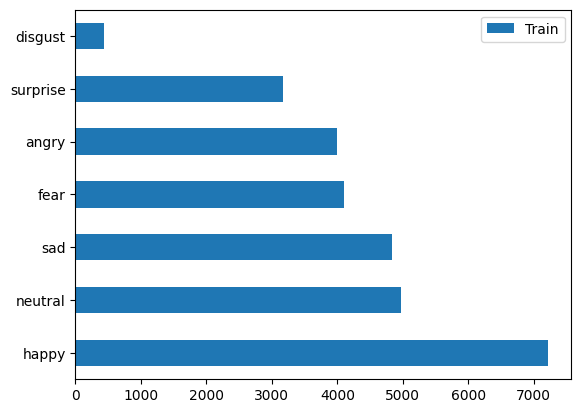

In [13]:
 Train_Count.plot(kind='barh')

<Axes: >

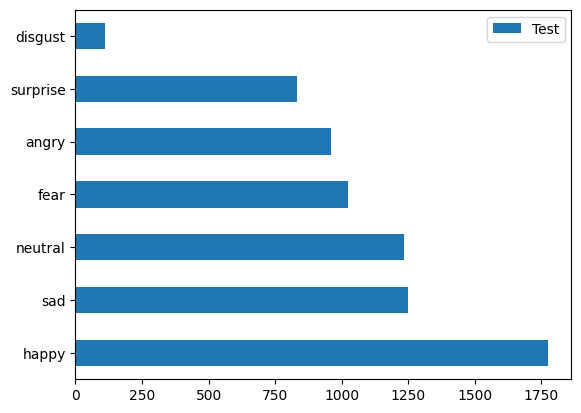

In [14]:
Test_Count.plot(kind='barh')

In [15]:
from tensorflow.keras.preprocessing.image import load_img

BASE_URL = "C:/Users/saiko/Downloads/Emotion/dataset/train"

plt.figure(figsize=(15, 6))   # set figure size

for idx, directory in enumerate(os.listdir(BASE_URL)):
    if directory[0] != "-":  # skip hidden/system files
        class_path = os.path.join(BASE_URL, directory)
        files = os.listdir(class_path)

        if files:  # make sure folder not empty
            img_path = os.path.join(class_path, files[0])  # take first image
            img = load_img(img_path, target_size=(48, 48),color_mode='rgb')  # resize for display

            plt.subplot(2, 4, idx + 1)   # adjust rows/cols if you have >8 classes
            plt.imshow(img)
            plt.title(directory)
            plt.axis("off")

plt.tight_layout()
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/saiko/Downloads/Emotion/dataset/train'

<Figure size 1500x600 with 0 Axes>

In [ ]:
img_shape = 48
batch_size = 64
train_data_path = "C:/Users/saiko/Downloads/Emotion/dataset/train"
test_data_path = "C:/Users/saiko/Downloads/Emotion/dataset/test" 

In [ ]:
train_preprocessor = ImageDataGenerator(
    rescale = 1/255.,
    #data augmentation
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)
test_preprocessor = ImageDataGenerator(
    rescale = 1/255.,
)
train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)
test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape, img_shape),
    color_mode="rgb",
    shuffle=False,      
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
#Buliding CNN Model

In [ ]:
def Create_CNN_Model():
    model = se